In [15]:
import matplotlib.pyplot as plt
import numpy
import tensorflow as tf
import os 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# plot_importance( )를 이용하여 feature 중요도 시각화
from xgboost import XGBRegressor, plot_importance
from lightgbm import LGBMRegressor, plot_importance

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras   import utils, Model
from tensorflow.python.client import device_lib



gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # 텐서플로가 첫 번째 GPU에 1GB 메모리만 할당하도록 제한
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024*6)])
  except RuntimeError as e:
    # 프로그램 시작시에 가장 장치가 설정되어야만 합니다
    print(e)
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [9]:
Boston = pd.read_csv('dataset\housing.csv', header = None, delim_whitespace= True)

In [11]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [13]:
Boston.columns = [ str(i) for i in range(len(Boston.columns)) ]

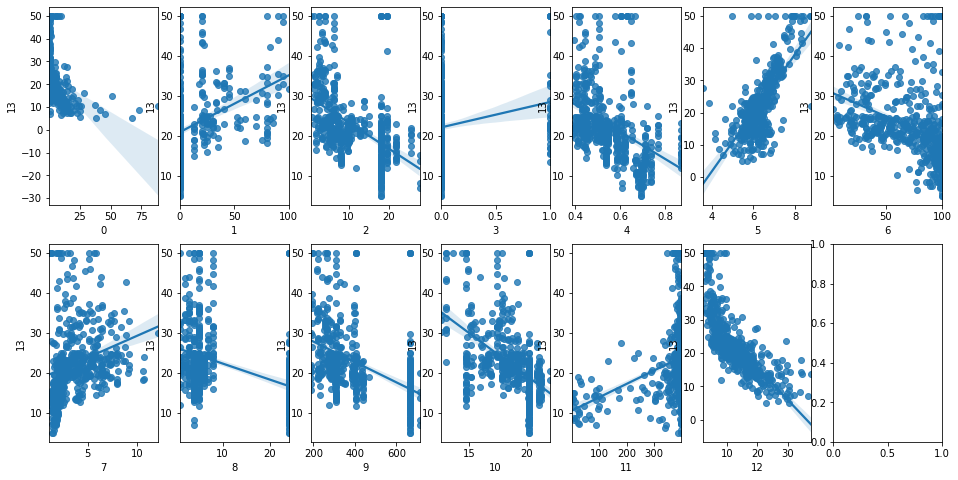

In [16]:
fig, axs = plt.subplots(figsize=(16,8) , ncols=7 , nrows=2)
lm_features = Boston.columns[:-1]
for i , feature in enumerate(lm_features):
    row = int(i/7)
    col = i%7
    sns.regplot(x= feature , y= Boston.columns[-1], data=Boston , ax=axs[row][col])

In [ ]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(LGB_MD, ax=ax)